In [10]:
import matplotlib.pyplot as plt
import imblearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_importance

In [80]:
svm = SVC(kernel='rbf', C=10, random_state=42, probability = True)
RF = RandomForestClassifier(random_state=42)
LR = LogisticRegression(random_state = 42)
DT = DecisionTreeClassifier(random_state=42)
BB = BalancedBaggingClassifier(DecisionTreeClassifier(random_state=42), bootstrap = True, random_state=42)
GB = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.1, max_features=2, max_depth = 50, random_state = 42)
XGB = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 50, subsample = 1)

In [5]:
from sklearn.decomposition import PCA

In [8]:
data = pd.read_csv("pca_data.csv")
data.drop(data.columns[0], axis = 1, inplace = True)
data.head()

,pca1,pca2,pca3,Attr5,Attr6,Attr9,Attr15,Attr17,Attr18,Attr20,...,Attr47,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64,class
0,-0.736027,-0.348747,-0.058040,-0.007032,-0.004030,-0.055249,0.032470,-0.029024,-0.129252,-0.103675,...,-0.051149,-0.045553,-0.058091,-0.031549,-0.016588,-0.046548,-0.024825,-0.067129,-0.088498,0
1,-1.346851,3.477502,-0.117813,-0.007454,-0.235543,-0.051780,-0.036294,0.006887,1.031123,-0.183374,...,-0.066955,0.005472,-0.113787,0.099133,-0.028335,-0.048775,0.012525,-0.033076,-0.090512,0
2,-0.179147,-2.537603,-0.033529,-0.007016,0.001522,-0.024981,-0.041462,-0.033089,-0.759637,-0.183374,...,-0.066955,-0.042601,-0.111453,-0.187408,-0.022549,-0.049574,-0.026057,-0.097240,-0.081367,0
3,-1.168294,0.404212,-0.067943,0.000447,0.053798,-0.051257,-0.032966,-0.021344,0.122720,-0.061746,...,-0.041480,-0.020404,2.419677,0.003994,-0.028335,-0.048031,-0.017621,0.005353,-0.070075,0
4,-0.821225,1.156009,-0.089037,-0.012538,0.129818,-0.072841,-0.032875,-0.027827,0.322233,-0.046371,...,-0.027693,-0.043371,-0.113987,0.036589,-0.020736,-0.048348,-0.021583,-0.065824,-0.087455,0


In [20]:
oversample = SMOTE()
X,y = oversample.fit_resample( X = data.iloc[:,:-1], y = data.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

In [15]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=200,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
pred_y = XGB.predict(X_test)
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.972
ROC AUC : 0.972


In [82]:
models = [svm, RF, LR, DT, BB, GB, XGB]

## What if, 처음부터 PCA?

In [51]:
bankrupt = pd.read_csv("outlier_removed_scaled.csv")
bankrupt.drop(bankrupt.columns[0], axis = 1, inplace = True)
bankrupt.head()

,Attr1,Attr5,Attr6,Attr10,Attr15,Attr17,Attr18,Attr19,Attr20,Attr21,...,Attr47,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64,class
0,0.825518,0.354326,0.446455,0.935388,0.535183,0.390249,0.825624,0.198565,0.326250,0.113042,...,0.295389,0.126600,0.324339,0.278214,0.362919,0.223740,0.133221,0.290416,0.063522,0
1,0.840844,0.354319,0.442478,0.937377,0.533641,0.281383,0.843568,0.200601,0.000000,0.094479,...,0.129272,0.129951,0.322302,0.280835,0.362623,0.432771,0.315668,0.341677,0.313909,0
2,0.815517,0.354327,0.446550,0.934436,0.533525,0.353376,0.815517,0.197817,0.000000,0.076257,...,0.129272,0.126727,0.322387,0.275078,0.362768,0.225466,0.109511,0.244347,0.158281,0
3,0.828908,0.354464,0.447444,0.936211,0.533716,0.432543,0.829592,0.198917,0.366537,0.106639,...,0.331060,0.127676,0.402793,0.278928,0.362623,0.191418,0.208927,0.365883,0.226220,0
4,0.831493,0.354225,0.448741,0.935711,0.533718,0.398505,0.832705,0.199659,0.377965,0.132312,...,0.364796,0.126694,0.322294,0.279581,0.362814,0.182541,0.175489,0.292142,0.084281,0


In [52]:
oversample = SMOTE()
X2,y2 = oversample.fit_resample(X = bankrupt.iloc[:,:-1], y = bankrupt.iloc[:,-1])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [53]:
pca=PCA(.95)
pca.fit(X2_train)
X_train_pca=pca.transform(X2_train)
X_test_pca=pca.transform(X2_test)

In [54]:
X_train_final = pd.DataFrame(X_train_pca)
X_test_final = pd.DataFrame(X_test_pca)
X_train_final.head()

,0,1,2,3,4,5,6,7
0,0.210013,-0.066640,-0.013655,-0.029815,-0.026534,0.028728,0.012330,0.004534
1,-0.039535,0.052690,-0.108189,-0.015911,-0.014567,0.020102,-0.017308,-0.008318
2,-0.031687,0.015064,0.015693,0.029798,0.284234,-0.037715,0.040006,0.019602
3,-0.310510,-0.076189,0.001067,-0.182459,-0.055533,-0.130728,-0.030453,0.004837
4,0.091615,0.252980,0.136602,-0.033940,-0.028949,0.007196,0.030566,-0.001945


In [55]:
cov_mat=np.cov(X2_train.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)

In [56]:
X2_train

,Attr1,Attr5,Attr6,Attr10,Attr15,Attr17,Attr18,Attr19,Attr20,Attr21,...,Attr46,Attr47,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64
10548,0.826245,0.354103,0.446529,0.934551,0.537087,0.356666,0.826314,0.198686,0.436106,0.107946,...,0.252546,0.380217,0.126538,0.322146,0.278383,0.362623,0.139727,0.125097,0.158129,0.083978
7105,0.827698,0.354328,0.446352,0.936018,0.533779,0.415486,0.828159,0.198786,0.319215,0.113843,...,0.261488,0.288875,0.126734,0.323153,0.278688,0.362626,0.229606,0.169526,0.375233,0.149545
10240,0.819651,0.354157,0.445996,0.931558,0.528446,0.299520,0.818995,0.198404,0.330924,0.111964,...,0.251972,0.284315,0.126255,0.322103,0.252904,0.362623,0.220001,0.455533,0.266720,0.178914
11882,0.832478,0.354392,0.446550,0.935106,0.533743,0.373939,0.833629,0.199035,0.000000,0.121066,...,0.249125,0.129272,0.127372,0.322574,0.280023,0.362623,0.139103,0.128579,0.343115,0.253812
7971,0.824609,0.354307,0.446031,0.935799,0.533648,0.405595,0.825068,0.198519,0.478449,0.095785,...,0.268248,0.411199,0.133651,0.323063,0.278098,0.362623,0.111546,0.178008,0.327604,0.397450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.827022,0.354239,0.446689,0.933249,0.534258,0.329343,0.827254,0.198697,0.308101,0.105601,...,0.252967,0.275903,0.126490,0.318140,0.278848,0.363243,0.238795,0.244389,0.301451,0.182124
5191,0.827659,0.354359,0.446550,0.935307,0.533978,0.381249,0.828037,0.199011,0.553590,0.104829,...,0.268574,0.452826,0.129098,0.323085,0.278743,0.362623,0.069481,0.098155,0.194086,0.225565
5390,0.828787,0.354570,0.446550,0.936269,0.533782,0.430897,0.828787,0.198786,0.308344,0.112814,...,0.300063,0.330425,0.129567,0.322376,0.278897,0.362623,0.238585,0.122122,0.422961,0.342614
860,0.830832,0.354303,0.447345,0.935271,0.533764,0.379853,0.831932,0.198803,0.333439,0.088836,...,0.262688,0.298971,0.132785,0.323118,0.279547,0.362623,0.217862,0.189391,0.426658,0.497026


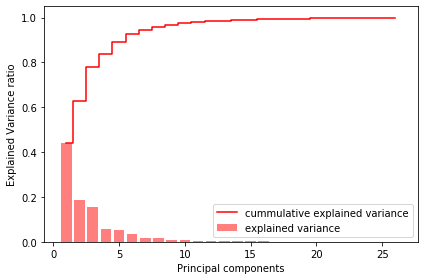

In [64]:
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)

plt.bar(range(1,27),var_exp,alpha=0.5,align='center',label='explained variance',color='r')
plt.step(range(1,27),cum_var_exp,where='mid',label='cummulative explained variance',color='r')
plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

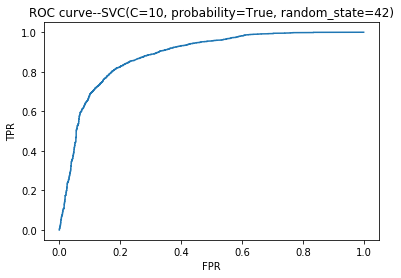

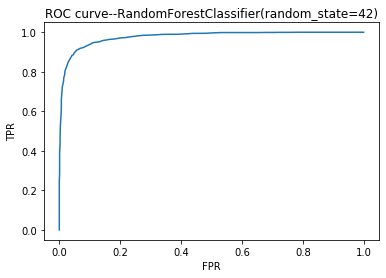

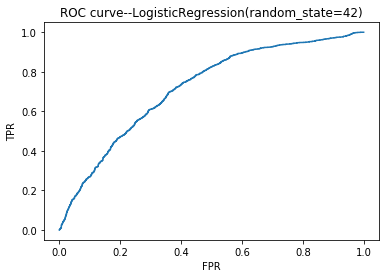

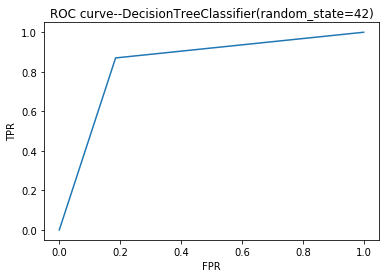

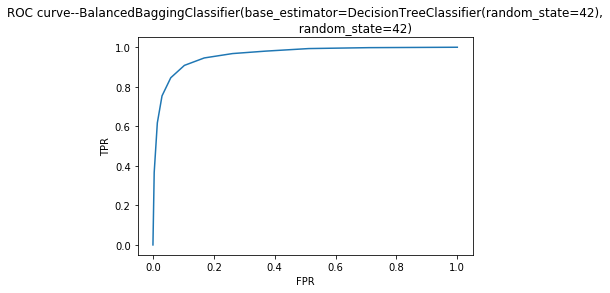

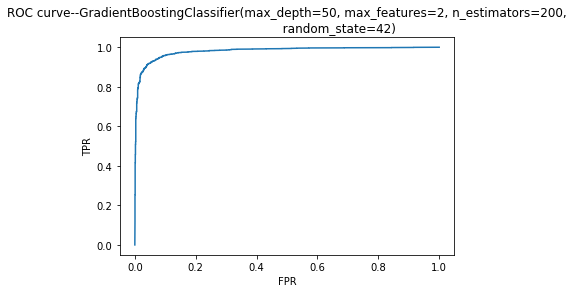

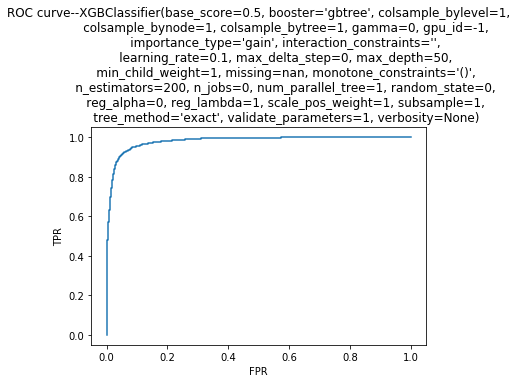

In [83]:
 for i in range(len(models)):
        clf = models[i]
        clf = clf.fit(X_train_final, y2_train)
        y2_test_predicted = clf.predict(X_test_final)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, clf.predict_proba(X_test_final)[:,1])
        
        plt.clf()
        plt.plot(false_positive_rate, true_positive_rate)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC curve-' + '-' + str(clf))
        plt.show()
